# Sentiment Analysis - SVM with TFBinICF Term Weighting

`SVM Kernel = Linear; Term Weighting = TFBinICF`

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np 
import re #RegEx
import itertools
import matplotlib.pyplot as plt

from sklearn import svm #Import SVM Classification
from sklearn.feature_extraction.text import CountVectorizer #Count Vector Space Model
from sklearn import metrics #Matrix Builder
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #Import KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.metrics import classification_report
from textvec import vectorizers

## Load Dataset

*Dataset is already preprocessed before.*

In [2]:
df = pd.read_csv('data/clean_tweets.csv')
df #Print Dataset

,tweet,stemming,label
0,#AyoTolakUUIKN \n\nProyek IKN membuka peluang ...,"['proyek', 'ikn', 'buka', 'peluang', 'oligarki...",0.0
1,Tolak UU IKN karena berpotensi merusak lingkun...,"['tolak', 'uu', 'ikn', 'potensi', 'rusak', 'li...",0.0
2,UU IKN hanya akan merugikan rakyat dengan huta...,"['uu', 'ikn', 'rugi', 'rakyat', 'hutang', 'rib...",0.0
3,Jika UU ini diterapkan yang terjadi adalah mas...,"['uu', 'terap', 'masyarakat', 'rasa', 'rugi', ...",0.0
4,UU IKN Syarat kepentingan oligarki. Tolak n ba...,"['uu', 'ikn', 'syarat', 'penting', 'oligarki',...",0.0
...,...,...,...
5887,Horee!! Kabar gembira gaes!\nProses pemindahan...,"['horee', 'kabar', 'gembira', 'proses', 'pinda...",1.0
5888,Juru Bicara Presiden RI Fadjroel Rachman menga...,"['juru', 'bicara', 'presiden', 'ri', 'fadjroel...",1.0
5889,Pemerintah Indonesia mengajak Korea Selatan un...,"['perintah', 'indonesia', 'ajak', 'korea', 'se...",1.0
5890,@pikiran_rakyat masalah Jakarta tepatnya harus...,"['jakarta', 'tepat', 'asai', 'hadap', 'selesai...",0.0


*Count each labels total value*

In [3]:
df['label'].value_counts()

1.0    3750
0.0    2142
Name: label, dtype: int64

### Implementing TFBinICF Feature Weighthing

In [4]:
vectorizer = CountVectorizer(strip_accents='unicode',token_pattern=r'\w{1,}',ngram_range=(1, 1)).fit(df['stemming'])
tfbinicf_vec = vectorizers.TfBinIcfVectorizer(sublinear_tf=True)
tfbinicf_vec.fit(vectorizer.transform(df['stemming']), df['label'])
TFBinICF = tfbinicf_vec.transform(vectorizer.transform(df['stemming']))

In [5]:
print(TFBinICF)

  (0, 6109)	0.2802374633650603
  (0, 5844)	0.2802374633650603
  (0, 4597)	0.2802374633650603
  (0, 4230)	0.2802374633650603
  (0, 4012)	0.2802374633650603
  (0, 3265)	0.2802374633650603
  (0, 2075)	0.47448327098382276
  (0, 1075)	0.47448327098382276
  (0, 838)	0.2802374633650603
  (1, 6109)	0.2902913877205925
  (1, 5844)	0.2902913877205925
  (1, 4902)	0.2902913877205925
  (1, 4597)	0.2902913877205925
  (1, 4485)	0.2902913877205925
  (1, 4012)	0.2902913877205925
  (1, 3377)	0.2902913877205925
  (1, 3310)	0.2902913877205925
  (1, 3174)	0.2902913877205925
  (1, 2075)	0.4915060446599551
  (2, 6109)	0.2787825671444079
  (2, 5945)	0.2787825671444079
  (2, 4886)	0.2787825671444079
  (2, 4813)	0.2787825671444079
  (2, 4678)	0.2787825671444079
  (2, 4597)	0.2787825671444079
  :	:
  (5890, 3377)	0.20912107515500974
  (5890, 2939)	0.20912107515500974
  (5890, 2615)	0.20912107515500974
  (5890, 2480)	0.20912107515500974
  (5890, 2324)	0.35407275879436917
  (5890, 2321)	0.20912107515500974
  (5890,

*Separate label to its own representative array*

In [6]:
label = []
for data in df['label']:
    label.append(data)
kolom = label.pop

In [7]:
def Average(lst):
    return sum(lst) / len(lst)

### KFold Cross Validation

In [8]:
folds = range(2,11)
for k in folds:
    accuracy=[]
    kFoldCrossValidation = KFold(n_splits=k, random_state=0, shuffle = True)
    for train, test in kFoldCrossValidation.split(TFBinICF, label):
        trainData, testData = TFBinICF[train], TFBinICF[test]
        label = np.array(label)
        trainData2, testData2 = label[train], label[test]
        
        SVM = SVC(kernel = 'linear', C = 1)
        model = SVM.fit(trainData, trainData2)
        prediksi = model.predict(testData)
        
        accuracy.append(accuracy_score(testData2, prediksi))
        
    print('Folds : %d | Avg Accuracy : %.3f | Max, Min : %.3f, %.3f' 
          % (k, Average(accuracy), max(accuracy), min(accuracy)))
    print("\n")

Folds : 2 | Avg Accuracy : 0.867 | Max, Min : 0.870, 0.865


Folds : 3 | Avg Accuracy : 0.868 | Max, Min : 0.873, 0.864


Folds : 4 | Avg Accuracy : 0.873 | Max, Min : 0.881, 0.868


Folds : 5 | Avg Accuracy : 0.871 | Max, Min : 0.882, 0.863


Folds : 6 | Avg Accuracy : 0.872 | Max, Min : 0.888, 0.862


Folds : 7 | Avg Accuracy : 0.873 | Max, Min : 0.884, 0.861


Folds : 8 | Avg Accuracy : 0.873 | Max, Min : 0.887, 0.857


Folds : 9 | Avg Accuracy : 0.873 | Max, Min : 0.887, 0.860


Folds : 10 | Avg Accuracy : 0.874 | Max, Min : 0.902, 0.858




### Implementing KFold with chosen K value

In [10]:
#K-Fold Cross Validation will iterate k times
kFoldCrossValidation = KFold(n_splits=7, random_state=0, shuffle = True)

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)
    
for train, test in kFoldCrossValidation.split(TFBinICF, label):
    #Initiate Train and Test Data then transform to TFIDF value. Then copy to new Train and Test variables. 
    trainData, testData = TFBinICF[train], TFBinICF[test]
    label = np.array(label)
    trainData2, testData2 = label[train], label[test]
    
    SVM = SVC(kernel = 'linear', C = 1)
    model = SVM.fit(trainData, trainData2)
    prediksi = model.predict(testData)
    
    #Appending result to calculate total accuracy
    actual_classes = np.append(actual_classes, label[test])
    predicted_classes = np.append(predicted_classes, model.predict(testData))
   
    #Append accuracy to calculate average accuracy
    accuracy.append(accuracy_score(testData2, prediksi))

conf_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)
svm_accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
precision = metrics.precision_score(actual_classes, predicted_classes, average='binary')
recall = metrics.recall_score(actual_classes, predicted_classes, average='binary')
f1score = metrics.f1_score(actual_classes, predicted_classes, average='binary')

print("\nConfusion Matrix: \n", conf_matrix)
print("------------------------------------------------------------")
print(classification_report(actual_classes, predicted_classes, digits = 4,
                           target_names = ['Positive', 'Negative']))
print("------------------------------------------------------------")
print("\nAccuracy : %.3f, Precission : %.3f, Recall : %.3f, F1 Score : %.3f" %(svm_accuracy, precision, recall, f1score))


Confusion Matrix: 
 [[1609  533]
 [ 213 3537]]
------------------------------------------------------------
              precision    recall  f1-score   support

    Positive     0.8831    0.7512    0.8118      2142
    Negative     0.8690    0.9432    0.9046      3750

    accuracy                         0.8734      5892
   macro avg     0.8761    0.8472    0.8582      5892
weighted avg     0.8742    0.8734    0.8709      5892

------------------------------------------------------------

Accuracy : 0.873, Precission : 0.869, Recall : 0.943, F1 Score : 0.905


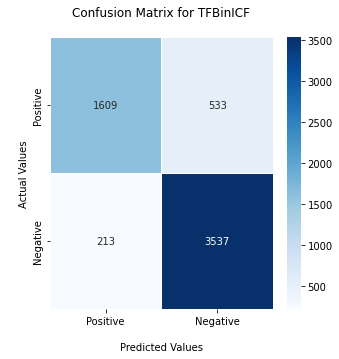

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
ax = sns.heatmap(conf_matrix, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
ax.set_title("Confusion Matrix for TFBinICF\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")
plt.show()